  Nate Reedel
  Project 3 & 4
  Description: Given the limited data from a reputed retail website that include relevant information of the consumer behaviour through website engagement for multiple product purchase. This is a detailed EDA on the data and a predictive model.

In [2]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Project_3-4.xlsx to Project_3-4.xlsx


In [22]:
# Create Data Frame #
df = pd.read_excel(io.BytesIO(uploaded['Project_3-4.xlsx']))


In [6]:
# Data Inspection #
print("\nData Info")
df.info()


Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchE

In [7]:
#Summary Statistics#

# separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(exclude=['int', 'float']).columns

# calculate mean and median for numeric columns
numeric_mean = df[numeric_cols].mean()
numeric_median = df[numeric_cols].median()
numeric_mode = df[numeric_cols].mode()

# calculate mode for categorical columns using value_counts()
categorical_mode = df[categorical_cols].apply(lambda x: x.value_counts().idxmax())

# display results
print("Numeric Data:")
print("Mean:")
print(numeric_mean)
print("\nMedian:")
print(numeric_median)
print("\nMode:")
print(numeric_mode)

print("\nCategorical Data:")
print("Mode:")
print(categorical_mode)


Numeric Data:
Mean:
HomePage                              2.250240
HomePage_Duration                    79.300762
LandingPage                           0.490739
LandingPage_Duration                 33.455943
ProductDescriptionPage               31.559488
ProductDescriptionPage_Duration    1184.346084
GoogleMetric:Bounce Rates             0.023366
GoogleMetric:Exit Rates               0.044664
GoogleMetric:Page Values              4.812620
SeasonalPurchase                      0.064083
OS                                    2.122422
SearchEngine                          2.356629
Zone                                  3.155673
Type of Traffic                       4.090143
WeekendPurchase                       0.234155
dtype: float64

Median:
HomePage                             1.000000
HomePage_Duration                    5.000000
LandingPage                          0.000000
LandingPage_Duration                 0.000000
ProductDescriptionPage              17.500000
ProductDescriptionPag

In [23]:
# Display the count of missing values for each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64


In [8]:
# Clean Up: missing values (forward fill using previous column value) #

# display the count of missing values for each column
missing_values = df.isnull().sum()
print("DF (before fill)")
print("\nMissing values per column:")
print(missing_values)

# forward fill
df_filled = df.fillna(method='ffill')
df_filled.dropna()

# display column count after forward fill
missing_values = df_filled.isnull().sum()
print("\nDF (after fill)")
print("\nMissing values per column:")
print(missing_values)


DF (before fill)

Missing values per column:
HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

DF (after fill)

Missing values per column:
HomePage                           0
Ho

In [9]:
# Clean Up: remove outliers #
numeric_outliers = 0
categoric_outliers = 0
# function to remove outliers from a single column based on custom criteria
def remove_outliers(column):

    # For numeric columns, use z-score based approach
    if pd.api.types.is_numeric_dtype(column):
        z_scores = (column - column.mean()) / column.std()
        threshold = 3
        global numeric_outliers
        numeric_outliers += 1
        return column[abs(z_scores) < threshold]
    else:
        # For non-numeric columns, remove values occurring less frequently
        value_counts = column.value_counts()
        threshold = 1  # Set a threshold based on your data distribution
        frequent_values = value_counts[value_counts >= threshold].index
        global categoric_outliers
        categoric_outliers += 1
        return column[column.isin(frequent_values)]

# apply outlier removal function to each column
df_filtered = df_filled.apply(remove_outliers, axis=0)

# print outlier count
print("numerical outliers total :",numeric_outliers)
print("categorical outliers total :",categoric_outliers)
print("total outiers :",(numeric_outliers+categoric_outliers))
print()

# fill filtered dataframe
df_filtered = df_filtered.fillna(method='ffill')


numerical outliers total : 16
categorical outliers total : 6
total outiers : 22



In [10]:
# Clean Up: feature scalling using normalization for numeric #

from sklearn.preprocessing import StandardScaler

# Separate numeric and non-numeric columns
numeric_cols = df_filtered.select_dtypes(include=['int', 'float']).columns
non_numeric_cols = df_filtered.select_dtypes(exclude=['int', 'float']).columns

# Normalize numeric columns
scaler = StandardScaler()
df_filtered[numeric_cols] = scaler.fit_transform(df_filtered[numeric_cols])

# Encode non-numeric columns (one-hot encoding)
normal_df = pd.get_dummies(df_filtered, columns=non_numeric_cols)


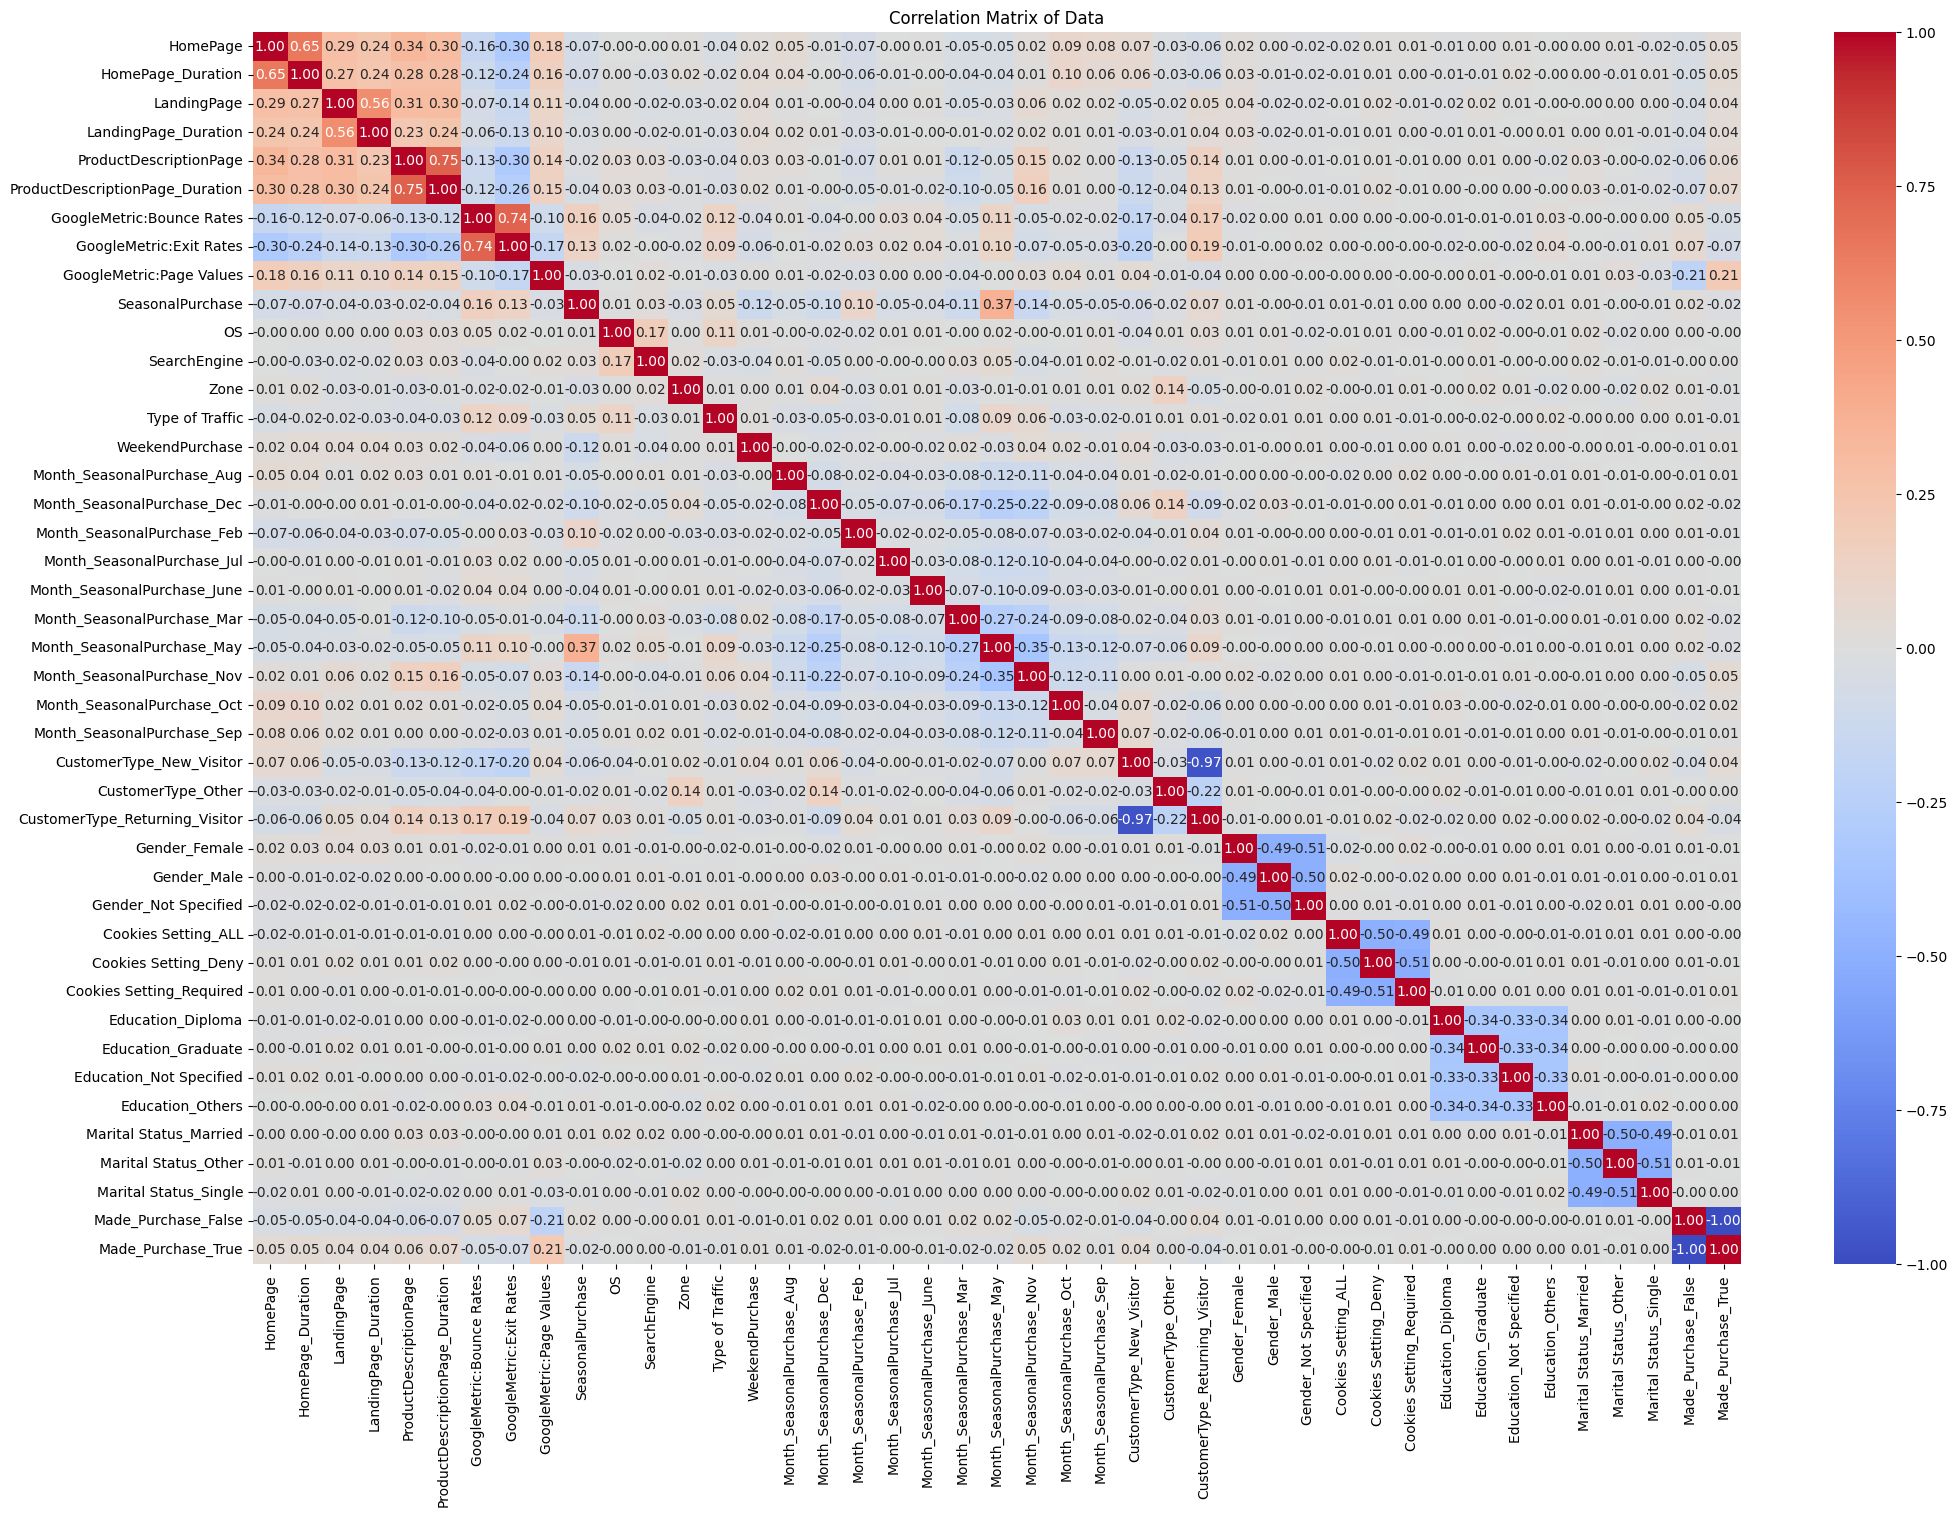

In [11]:
# Plot(Correlation): all data
df_corr = normal_df.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Data')
plt.show()

In [13]:
# Prediction #
def prediction(prediction_df, columnI,columnII,quantity_predicted):
  X = prediction_df[columnI].values
  y = prediction_df[columnII].values
  X = X.reshape(-1,1)
  y = y.reshape(-1,1)

  # split X and y into training and test data sets
  from sklearn.model_selection import train_test_split
  X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  # fit the linear model for predictions

  # instantiate the linear regression object lm
  from sklearn.linear_model import LinearRegression
  lm = LinearRegression()

  # train the model using training data sets
  lm.fit(X_train,y_train)

  # predict on the test data
  y_pred=lm.predict(X_test)

  return lm.predict(X)[0:quantity_predicted]


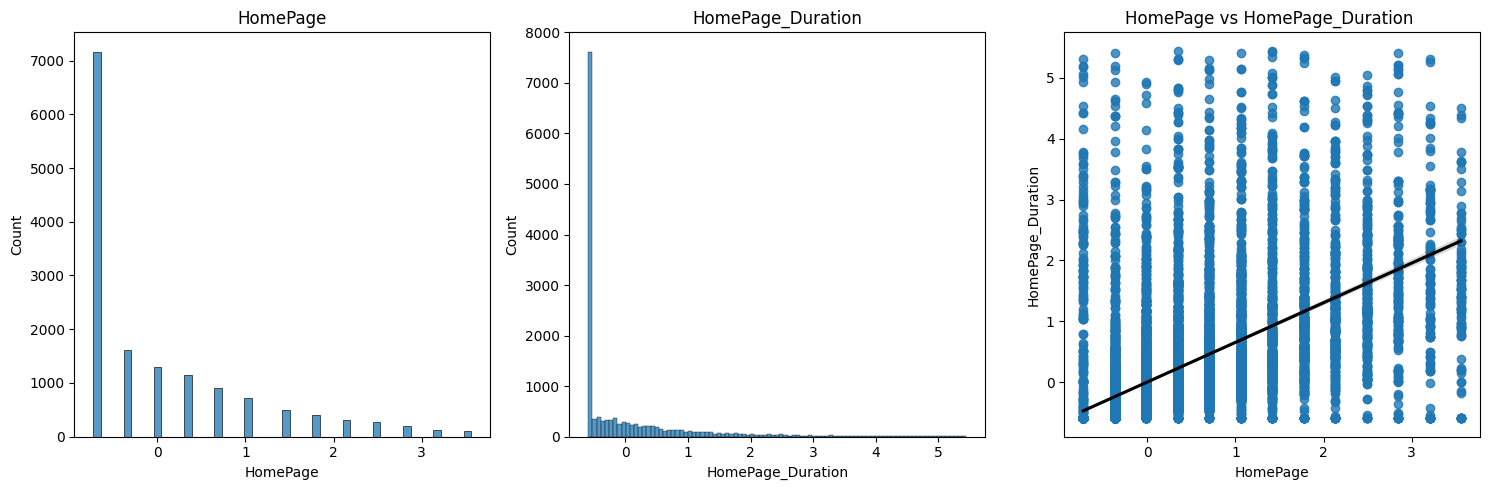

In [16]:
# Plot(2 histo, 1 scatter) for 'HomePage', 'HomePage_Duration'

# Create a figure and axis with Seaborn subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# graph 1
sns.histplot(normal_df['HomePage'],ax=axes[0])
axes[0].set_title('HomePage')
plt.xlabel('HomePage')
plt.ylabel('Frequency')
# graph 2
sns.histplot(normal_df['HomePage_Duration'],ax=axes[1])
axes[1].set_title('HomePage_Duration')
plt.xlabel('HomePage_Duration')
plt.ylabel('Frequency')
# graph 3
sns.regplot(x=normal_df['HomePage'],y=normal_df['HomePage_Duration'], ax=axes[2], line_kws={"color":"black"})
axes[2].set_title('HomePage vs HomePage_Duration ')
plt.xlabel('HomePage')
plt.ylabel('HomePage_Duration')
plt.xlabel('HomePage')
# display
plt.tight_layout()
plt.show()

In [17]:
# Predict Homepage_Duration:
print("Predict next 5 Homepage_Duration values ")
print(prediction(normal_df,'HomePage','HomePage_Duration',5))


Predict next 5 Homepage_Duration values 
[[-0.46944055]
 [-0.46944055]
 [-0.46944055]
 [-0.46944055]
 [-0.23620674]]


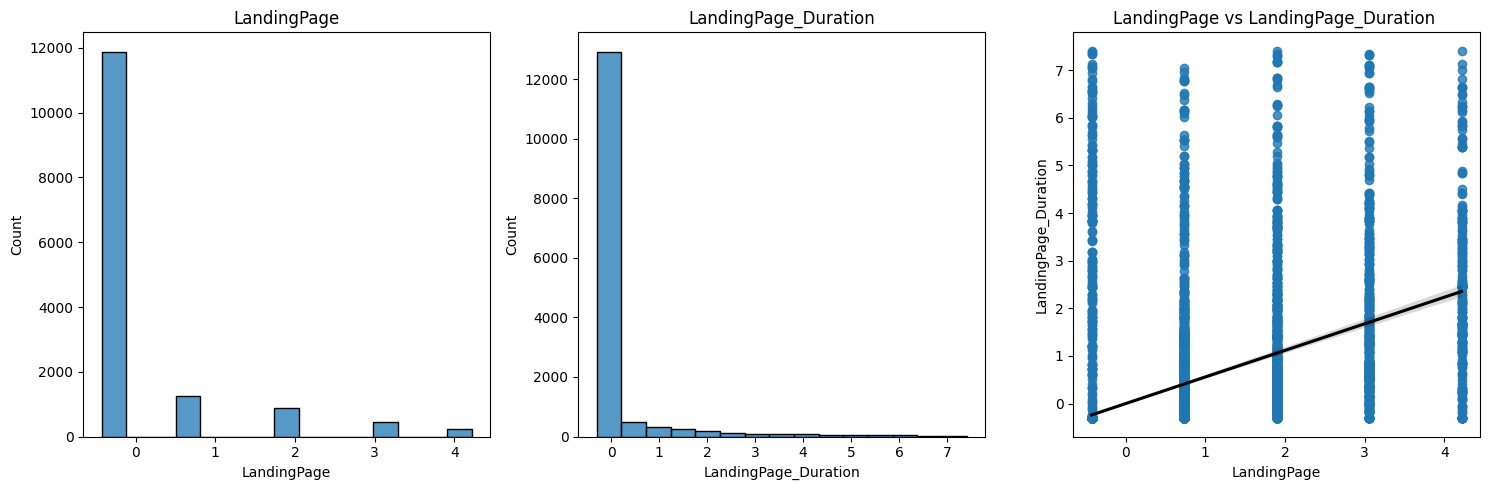

In [18]:
# Plot(2 histo, 1 scatter) for: 'LandingPage', 'LandingPage_Duration'

# Create a figure and axis with Seaborn subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# graph 1
sns.histplot(normal_df['LandingPage'],ax=axes[0])
axes[0].set_title('LandingPage')
plt.xlabel('LandingPage')
plt.ylabel('Frequency')
# graph 2
sns.histplot(normal_df['LandingPage_Duration'],ax=axes[1])
axes[1].set_title('LandingPage_Duration')
plt.xlabel('LandingPage_Duration')
plt.ylabel('Frequency')
sns.regplot(x=normal_df['LandingPage'],y=normal_df['LandingPage_Duration'], ax=axes[2], line_kws={"color":"black"})
# graph 3
axes[2].set_title('LandingPage vs LandingPage_Duration ')
plt.xlabel('LandingPage')
plt.ylabel('LandingPage_Duration')
# display
plt.tight_layout()
plt.show()

In [19]:
# Predict LandingPage_Duration:
print("Predict next 5 LandingPage_Duration values ")
print(prediction(normal_df,'LandingPage','LandingPage_Duration',5))


Predict next 5 LandingPage_Duration values 
[[-0.23809871]
 [-0.23809871]
 [-0.23809871]
 [-0.23809871]
 [-0.23809871]]


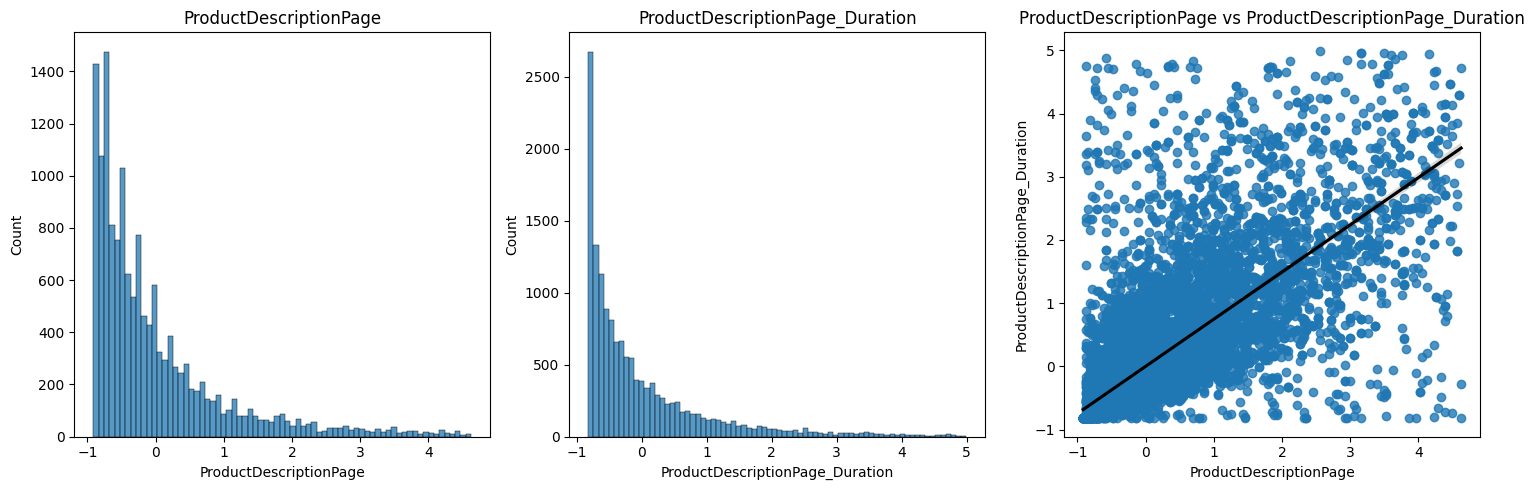

In [20]:
# Plot(2 histo, 1 scatter) for 'ProductDescriptionPage', 'ProductDescriptionPage_Duration'

# Create a figure and axis with Seaborn subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# graph 1
sns.histplot(normal_df['ProductDescriptionPage'],ax=axes[0])
axes[0].set_title('ProductDescriptionPage')
plt.xlabel('ProductDescriptionPage')
plt.ylabel('Frequency')
# graph 2
sns.histplot(normal_df['ProductDescriptionPage_Duration'],ax=axes[1])
axes[1].set_title('ProductDescriptionPage_Duration')
plt.xlabel('ProductDescriptionPage_Duration')
plt.ylabel('Frequency')
# graph 3
sns.regplot(x=normal_df['ProductDescriptionPage'],y=normal_df['ProductDescriptionPage_Duration'], ax=axes[2],line_kws={"color":"black"})
axes[2].set_title('ProductDescriptionPage vs ProductDescriptionPage_Duration')
plt.xlabel('ProductDescriptionPage')
plt.ylabel('ProductDescriptionPage_Duration')
# display
plt.tight_layout()
plt.show()

In [21]:
# Predict LandingPage_Duration
print("Predict next 5 ProductDescriptionPage_Duration values ")
print(prediction(normal_df,'ProductDescriptionPage','ProductDescriptionPage_Duration',5))


Predict next 5 ProductDescriptionPage_Duration values 
[[-0.66511388]
 [-0.63962626]
 [-0.43572531]
 [-0.66511388]
 [-0.6906015 ]]
